# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import pprint as pprint

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        city_lng = city_weather['city']['coord']['lon']
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        city_humidity = city_weather['list'][0]['main']['humidity']
        city_clouds = city_weather['list'][0]['clouds']['all']
        city_wind = city_weather['list'][0]['wind']['speed']
        city_country = city_weather['city']['country']
        city_date = city_weather['list'][0]['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | sumbe
Processing Record 3 of Set 1 | tarawa
Processing Record 4 of Set 1 | borovsk
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | yuzhno-kurilsk
Processing Record 7 of Set 1 | rotonda west
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | chimoio
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | ghat
Processing Record 18 of Set 1 | gadzhiyevo
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | edinburgh of the seven seas
Proc

In [82]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,21.77,68,99,1.76,RU,1690178400
1,sumbe,-11.2061,13.8437,19.56,91,34,0.32,AO,1690178400
2,tarawa,1.4190,172.9840,30.74,70,68,4.15,KI,1690178400
3,borovsk,55.2064,36.4861,13.41,93,67,2.89,RU,1690178400
4,blackmans bay,-43.0167,147.3167,13.23,64,99,4.92,AU,1690178400


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,21.77,68,99,1.76,RU,1690178400
1,sumbe,-11.2061,13.8437,19.56,91,34,0.32,AO,1690178400
2,tarawa,1.4190,172.9840,30.74,70,68,4.15,KI,1690178400
3,borovsk,55.2064,36.4861,13.41,93,67,2.89,RU,1690178400
4,blackmans bay,-43.0167,147.3167,13.23,64,99,4.92,AU,1690178400


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

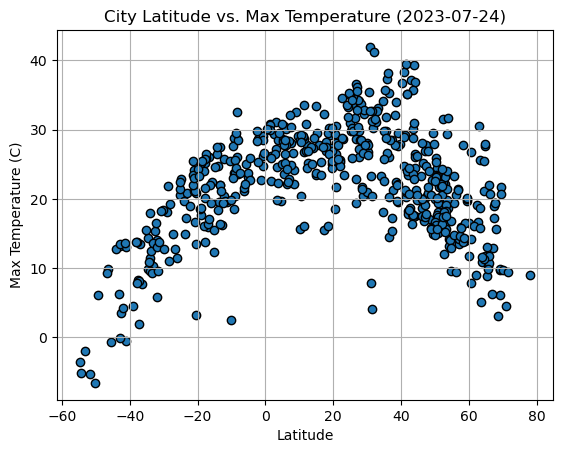

In [68]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o',edgecolors="black")

# Incorporate the other graph properties
date1 =pd.to_datetime(city_data_df['Date'].values[0], unit='s')
plt.title(f'City Latitude vs. Max Temperature ({date1.date()})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

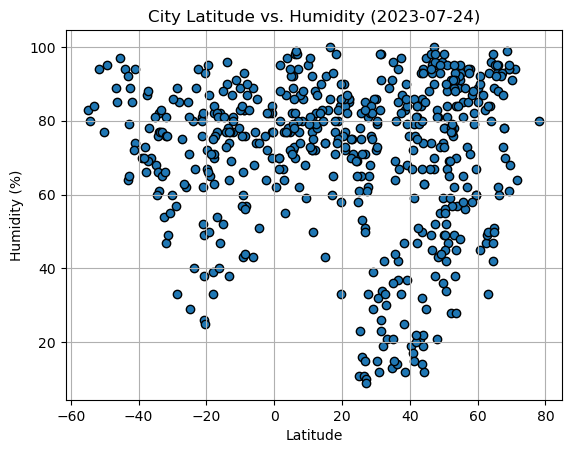

In [69]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o',edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date1.date()})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

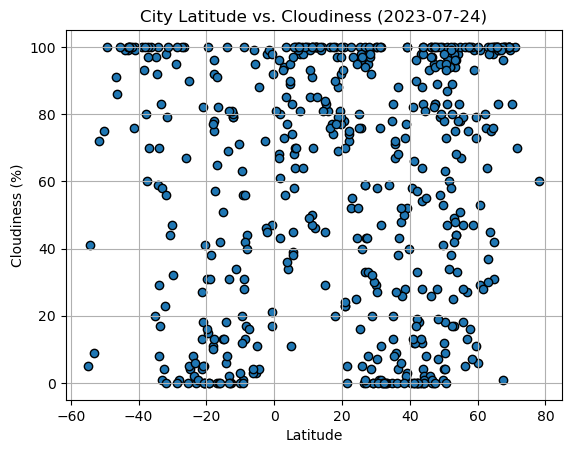

In [70]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o',edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date1.date()})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

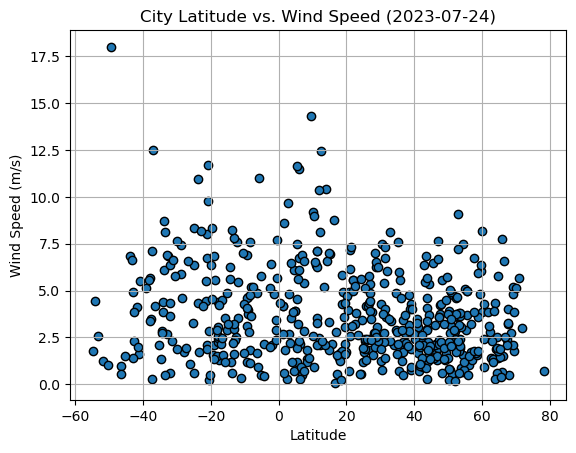

In [71]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o',edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date1.date()})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [148]:
# Define a function to create Linear Regression plots
from scipy import stats


def reg_plot(df,y_value):
    # Perform a linear regression on data columns
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df["Lat"], df[y_value])
    # Get regression values
    regress_values = df["Lat"] * slope + intercept
    line_eq = f'y ={round(slope,2)}x + {round(intercept,2)}'
    
    #Plot scatter, rgression line, formula and print the r-value
    print(f'The r-value is: {rvalue}')
    plt.scatter(df["Lat"], df[y_value], marker='o')
    plt.plot(df["Lat"], regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_value)
    plt.title(line_eq, fontsize=15,color="red")
    plt.show()
  
    
    

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,21.77,68,99,1.76,RU,1690178400
2,tarawa,1.4190,172.9840,30.74,70,68,4.15,KI,1690178400
3,borovsk,55.2064,36.4861,13.41,93,67,2.89,RU,1690178400
5,yuzhno-kurilsk,44.0306,145.8556,17.59,94,100,1.26,RU,1690178400
6,rotonda west,26.8837,-82.2901,28.60,85,33,1.83,US,1690178400


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sumbe,-11.2061,13.8437,19.56,91,34,0.32,AO,1690178400
4,blackmans bay,-43.0167,147.3167,13.23,64,99,4.92,AU,1690178400
8,west island,-12.1568,96.8225,25.75,81,79,7.58,CC,1690178400
11,port-aux-francais,-49.3500,70.2167,6.09,95,100,18.00,TF,1690178400
12,grytviken,-54.2811,-36.5092,-5.15,80,41,4.43,GS,1690178400


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5589503384914136


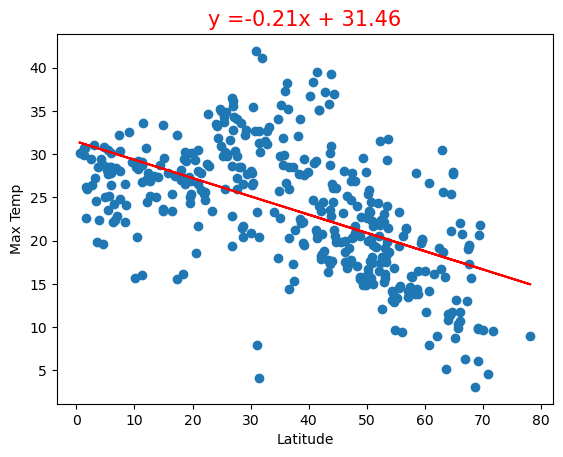

In [149]:
# Linear regression on Northern Hemisphere
reg_plot(northern_hemi_df,"Max Temp")

The r-value is: 0.8235153215968879


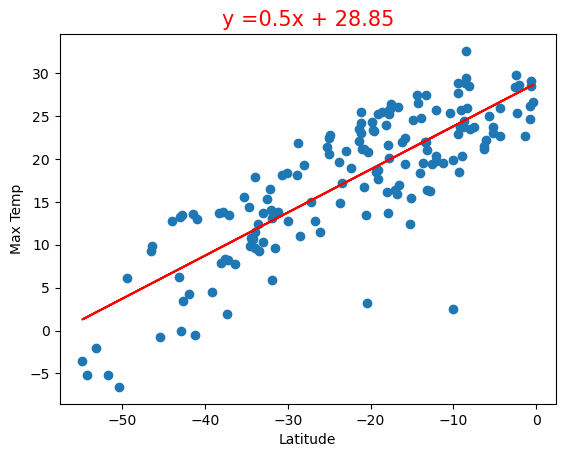

In [150]:
# Linear regression on Southern Hemisphere
reg_plot(southern_hemi_df,"Max Temp")

**Discussion about the linear relationship:**

For both hemispheres, there is a strong relationship between latitude and temperature. As the latitude moves closer to the equator the max temperature for each city increases. Outliers or cities that stray from the trend may be from other unaccounted factors sunch as terrain (ie mountainus areas will generally have lower temperatures.)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.027391871647404163


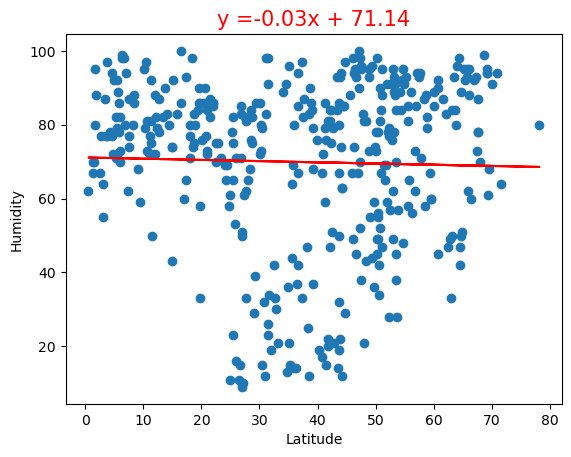

In [151]:
# Northern Hemisphere
reg_plot(northern_hemi_df,"Humidity")

The r-value is: -0.11814846889140596


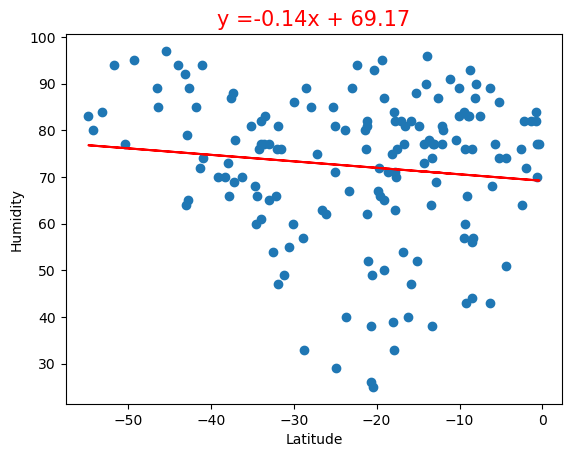

In [152]:
# Southern Hemisphere
reg_plot(southern_hemi_df,"Humidity")

**Discussion about the linear relationship:**

There is almost no relationship between humidity and latitde. If there is any relationship it is very slight in both hemispheres. In the Sothern hemisphere, humidity actually decreases as latitude approaches the equator, but in the northern hemispher it slightly increases approaching the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04822979276877211


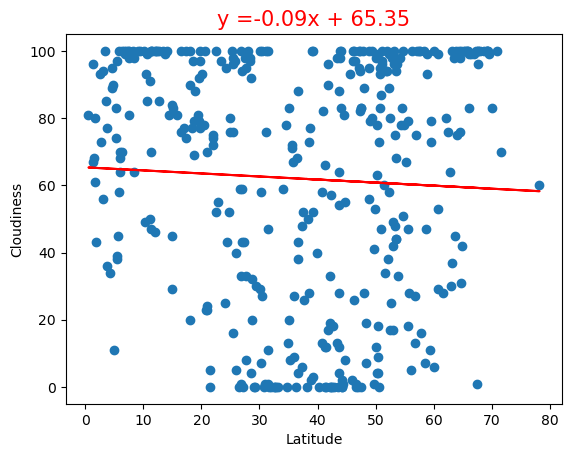

In [153]:
# Northern Hemisphere
reg_plot(northern_hemi_df,"Cloudiness")

The r-value is: -0.2957680491918344


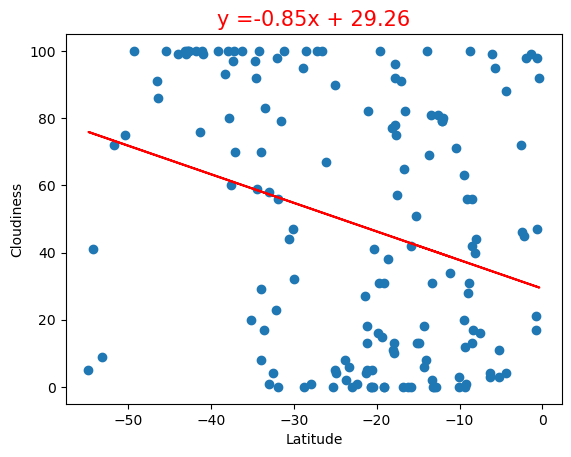

In [154]:
# Southern Hemisphere
reg_plot(southern_hemi_df,"Cloudiness")

**Discussion about the linear relationship:**
In the northern hemisphere, there is currently a very weak negative relationship between cloudniness and latitde - as we move away from the equator, cloudniess decreases. In the sothern hemisphere, the relationship is slightly strong, as cities are closer to the equator, cloudiness decreases. In both graphs, cloud levels cluster in extremes of 100% to 0%. latitidue does not have a significant impact on cloud coverage in a moment, but total cloud coverage or lack thereof clusters at lines of latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.22886350391115787


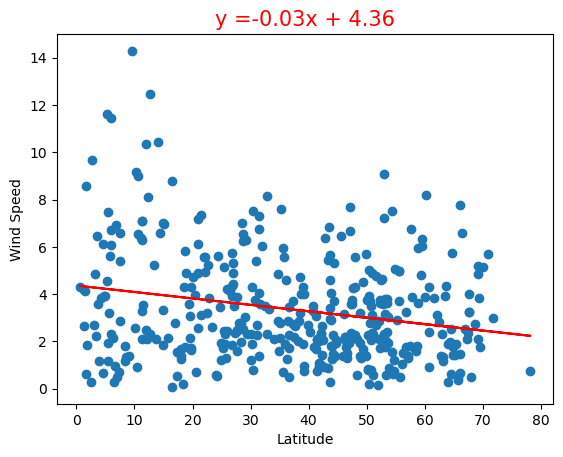

In [155]:
# Northern Hemisphere
reg_plot(northern_hemi_df,"Wind Speed")

The r-value is: -0.052403742942769595


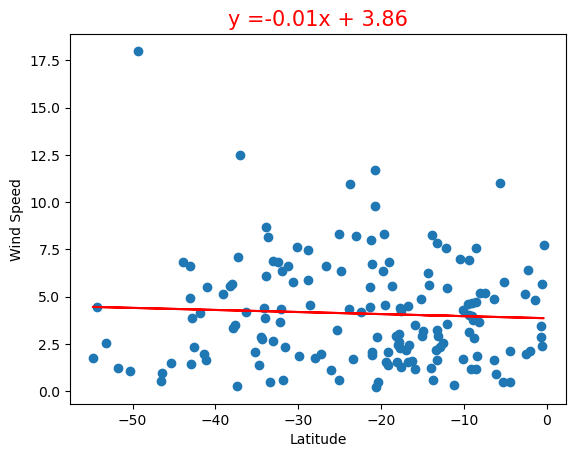

In [156]:
# Southern Hemisphere
reg_plot(southern_hemi_df,"Wind Speed")

**Discussion about the linear relationship:**

There is almost no relationship between latitude and windspeed by hemisphere. In the Northern hemisphere, windspeed is slightly higher as latitude moves towards the equator and in the southern hemisphere is slightly decreases moving towars the equator. The northern hemisphere could have slightly stonger wind speeds due to higher temperatures in the summer.